In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv', header = 0)
val  = pd.read_csv('val.csv' , header = 0)

full_data = [train, val]

train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,40041,Male,31.0,0,0,No,Self-employed,Rural,64.85,23.0,Unknown,0
1,55244,Male,40.0,0,0,Yes,Self-employed,Rural,65.29,28.3,never smoked,0
2,70992,Female,8.0,0,0,No,children,Urban,74.42,22.5,Unknown,0
3,38207,Female,79.0,1,0,Yes,Self-employed,Rural,76.64,19.5,never smoked,0
4,8541,Female,75.0,0,0,Yes,Govt_job,Rural,94.77,27.2,never smoked,0


In [2]:
train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,3924.000000,4088.000000
mean,36672.108855,43.464932,0.099804,0.054795,106.434481,28.943527,0.050391
std,21175.554576,22.560096,0.299776,0.227607,45.395197,7.814239,0.218778
min,67.000000,0.080000,0.000000,0.000000,55.230000,10.300000,0.000000
25%,18065.250000,26.000000,0.000000,0.000000,77.342500,23.600000,0.000000
50%,36990.000000,45.000000,0.000000,0.000000,92.210000,28.100000,0.000000
75%,54815.250000,61.000000,0.000000,0.000000,114.320000,33.200000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,92.000000,1.000000


In [3]:
train.replace({'gender': 'Other'}, 'Male', inplace=True)

In [4]:
train.nlargest(10, 'avg_glucose_level')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2097,69112,Male,68.0,1,1,Yes,Private,Rural,271.74,31.1,smokes,1
1746,22440,Female,49.0,0,0,Yes,Private,Urban,267.76,29.3,formerly smoked,0
4050,26267,Female,76.0,0,0,Yes,Self-employed,Urban,267.61,27.9,smokes,0
3312,10995,Male,76.0,1,0,Yes,Private,Rural,267.60,30.5,never smoked,0
885,27626,Female,60.0,0,0,No,Govt_job,Rural,266.59,25.5,never smoked,0
1077,13155,Female,67.0,1,0,Yes,Govt_job,Rural,263.56,26.3,never smoked,0
602,71279,Female,71.0,0,0,Yes,Govt_job,Urban,263.32,38.7,never smoked,1
1125,50070,Female,62.0,1,0,Yes,Self-employed,Rural,261.67,43.0,formerly smoked,0
2479,21534,Male,67.0,0,0,Yes,Private,Urban,260.85,NaN,Unknown,0
842,13491,Male,80.0,0,0,Yes,Private,Rural,259.63,31.7,smokes,1


In [9]:
train['CategAge'] = pd.qcut(train.age, 4)
train[['CategAge', 'stroke']].groupby(['CategAge'], as_index = False).mean()

,CategAge,stroke
0,"(0.079, 26.0]",0.001876
1,"(26.0, 45.0]",0.008955
2,"(45.0, 61.0]",0.054422
3,"(61.0, 82.0]",0.140688


In [216]:
train[['hypertension', 'stroke']].groupby(['hypertension'], as_index = False).mean()

,hypertension,stroke
0,0,0.040217
1,1,0.142157


In [204]:
train[['heart_disease', 'stroke']].groupby(['heart_disease'], as_index = False).mean()

,heart_disease,stroke
0,0,0.042961
1,1,0.178571


In [217]:
train[['ever_married', 'stroke']].groupby(['ever_married'], as_index = False).mean()

,ever_married,stroke
0,No,0.017329
1,Yes,0.067333


<AxesSubplot:>

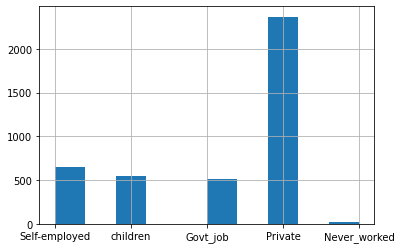

In [219]:
train.work_type.hist()

In [218]:
train[['work_type', 'stroke']].groupby(['work_type'], as_index = False).mean()

,work_type,stroke
0,Govt_job,0.052326
1,Never_worked,0.000000
2,Private,0.051163
3,Self-employed,0.086553
4,children,0.003683


In [220]:
train[['Residence_type', 'stroke']].groupby(['Residence_type'], as_index = False).mean()

,Residence_type,stroke
0,Rural,0.048780
1,Urban,0.052012


<AxesSubplot:>

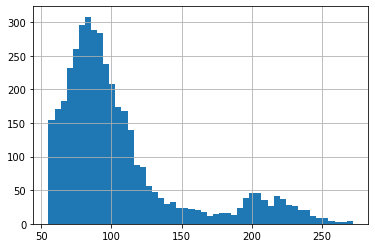

In [201]:
train.avg_glucose_level.hist(bins=50, density=False)

<AxesSubplot:xlabel='avg_glucose_level'>

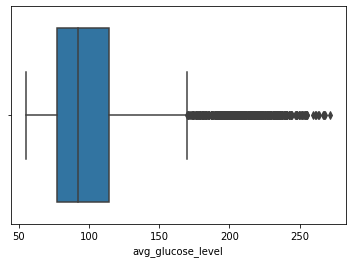

In [215]:
import seaborn as sns

sns.boxplot(x=train.avg_glucose_level)


In [16]:
train['CategGlucose'] = pd.cut(train.avg_glucose_level, 3)

train[['CategGlucose', 'stroke']].groupby(['CategGlucose'], as_index=False).mean()

,CategGlucose,stroke
0,"(55.013, 127.4]",0.037673
1,"(127.4, 199.57]",0.072816
2,"(199.57, 271.74]",0.142458


In [206]:
bmi_avg = train.bmi.median()
bmi_std = train.bmi.std()
bmi_nan_count = train.bmi.isna().sum()

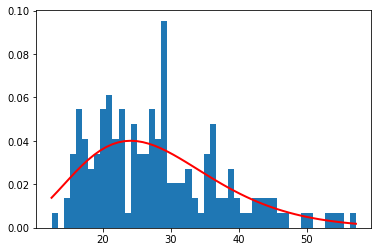

In [207]:
import matplotlib.pyplot as plt
import scipy.special as sps  

shape, scale = bmi_avg/4., 4.

bmi_nan_fill_list = np.random.gamma(shape, scale, bmi_nan_count)

count, bins, ignored = plt.hist(bmi_nan_fill_list, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()

#train.loc[np.isnan(train.bmi),'bmi'] = bmi_nan_fill_list

In [249]:
train['CategBMI'] = pd.cut(train.bmi, 4)

train[['CategBMI', 'stroke']].groupby(['CategBMI'], as_index=False).mean()

,CategBMI,stroke
0,"(10.218, 30.725]",0.040744
1,"(30.725, 51.15]",0.052788
2,"(51.15, 71.575]",0.020408
3,"(71.575, 92.0]",0.000000


<AxesSubplot:>

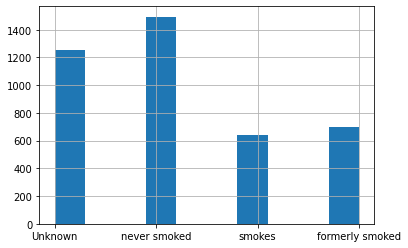

In [17]:
train.smoking_status.hist()

In [205]:
train[['smoking_status', 'stroke']].groupby(['smoking_status'], as_index = False).mean()

,smoking_status,stroke
0,Unknown,0.029435
1,formerly smoked,0.083095
2,never smoked,0.050870
3,smokes,0.054773


In [231]:
pd.crosstab(train.CategAge, train.work_type, values=train.stroke, aggfunc='mean')

work_type,Govt_job,Never_worked,Private,Self-employed,children
CategAge,,,,,
"(-0.00192, 27.387]",0.000000,0.0,0.000000,0.000000,0.003683
"(27.387, 54.693]",0.014706,NaN,0.018709,0.029557,NaN
"(54.693, 82.0]",0.113861,NaN,0.124079,0.119332,NaN


In [12]:
CrossTabRes = pd.crosstab(train.hypertension, train.heart_disease,
            #values=train.stroke, aggfunc='mean'
            )

In [19]:
from scipy.stats import chi2_contingency

chi2_contingency(CrossTabRes)[1]

4.7977231649749326e-12

In [ ]:
drop_elements = ['id', 'gender', 'hypertension', 'Residence_type', 'bmi']